In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# from knn import KNN

# Create Dataset

In [ ]:
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=3,
                  cluster_std=2.0,
                  random_state=1111)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111)

## Plot

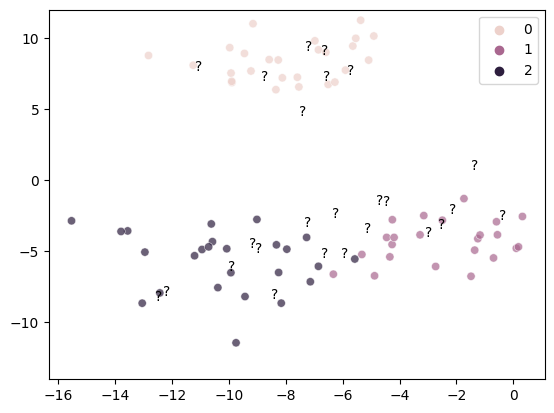

In [ ]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, alpha=0.7)
for i in range(len(X_test)):
    plt.text(x=X_test[i, 0], y=X_test[i, 1], s='?')
plt.ylim(-14, 12)
plt.show()

# KNN 

In [ ]:
from collections import Counter
import numpy as np

def euclidean_distance(x1: np.array, x2: np.array) -> int:
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # 유클리디안 거리 계산
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # 가장 가까운 k개 레이블 저장
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # k 개 레이블 중 가장 빈도가 많은 레이블 반환
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

## fit and predict

In [ ]:
knn = KNN(k=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Result

In [ ]:
correct = []
wrong = []
for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
        correct.append([*X_test[i], y_pred[i]])
    else:
        wrong.append([*X_test[i], y_pred[i]])
correct = np.stack(correct)
wrong = np.stack(wrong)

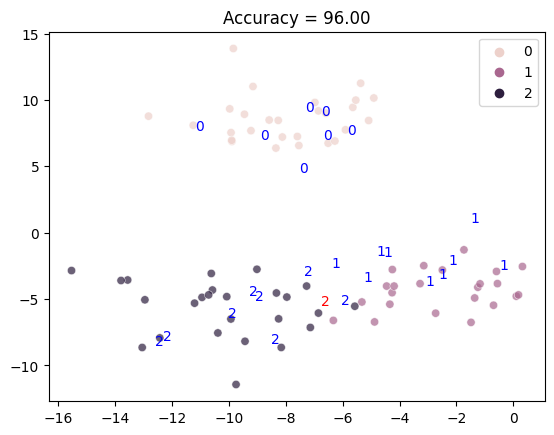

In [ ]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, alpha=0.7)
for i in range(len(correct)):
    plt.text(x=correct[i, 0], y=correct[i, 1], s=int(correct[i, 2]), c='b')
for i in range(len(wrong)):
    plt.text(x=wrong[i, 0], y=wrong[i, 1], s=int(wrong[i, 2]), c='r')
plt.title(f"Accuracy = {sum(y_pred==y_test)/len(y_test)*100:.2f}")
plt.show()

# With scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print(f"Accuracy: {sum(y_pred==y_test)/len(y_test)*100:.2f}")